In [ ]:
# 01_exploratory.ipynb
# AI-Powered Patient Readmission Prediction


# 1. Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set pandas options
pd.set_option('display.max_columns', 100)


# 2. Load Dataset

DATA_PATH = "/content/diabetic_data.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

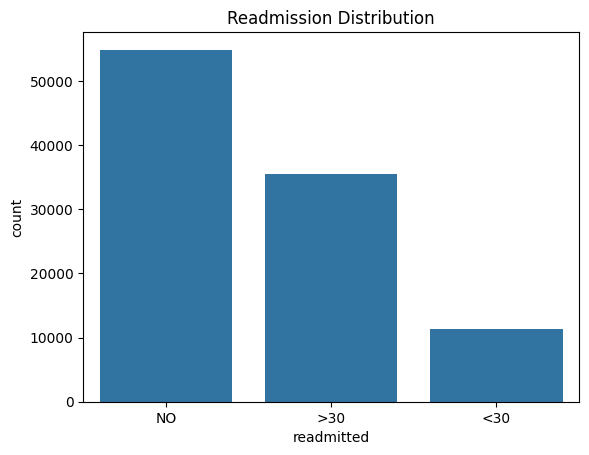

In [ ]:
# Basic info
df.info()
df.describe()

# Check target distribution
print("\nTarget variable distribution (readmitted):")
print(df['readmitted'].value_counts())
sns.countplot(x='readmitted', data=df)
plt.title("Readmission Distribution")
plt.show()


In [ ]:
# Missing values
missing = df.isin(['?']).sum() / len(df)
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:")
print(missing)

# Duplicate check
print("Duplicate rows:", df.duplicated().sum())


Columns with missing values:
weight               0.968585
medical_specialty    0.490822
payer_code           0.395574
race                 0.022336
diag_3               0.013983
diag_2               0.003518
diag_1               0.000206
dtype: float64
Duplicate rows: 0


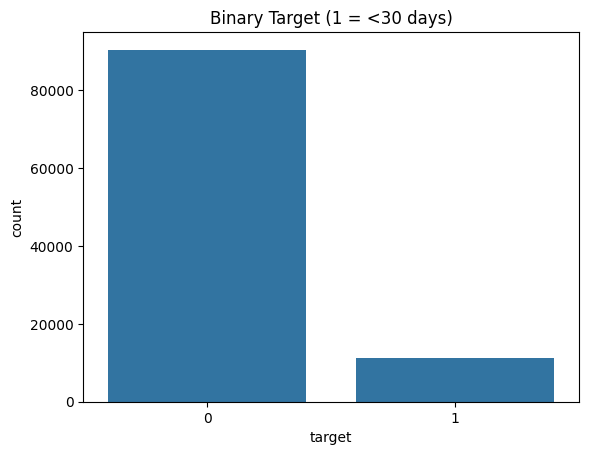

In [ ]:
# Binary target: 1 = readmitted within 30 days, 0 otherwise
df['target'] = (df['readmitted'] == '<30').astype(int)
df['target'].value_counts()
sns.countplot(x='target', data=df)
plt.title("Binary Target (1 = <30 days)")
plt.show()


In [ ]:
# Save initial cleaned version
os.makedirs("processed", exist_ok=True)
df.to_csv("processed/eda_cleaned.csv", index=False)
print("EDA-cleaned data saved to processed/eda_cleaned.csv")


EDA-cleaned data saved to processed/eda_cleaned.csv
